In [851]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline


In [859]:
data = pd.read_csv('Inspection.csv')
data.columns = data.columns.str.strip().str.replace(' ', '_')
data.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE_DESCRIPTION,INSPECTION_DATE,ACTION,VIOLATION_CODE,VIOLATION_DESCRIPTION,CRITICAL_FLAG,SCORE,GRADE,GRADE_DATE,RECORD_DATE,INSPECTION_TYPE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,5.0,A,05/11/2018,04/15/2019,Cycle Inspection / Initial Inspection
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/11/2018,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,5.0,A,05/11/2018,04/15/2019,Cycle Inspection / Initial Inspection
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Critical,7.0,A,05/18/2017,04/15/2019,Cycle Inspection / Initial Inspection
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,05/18/2017,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,7.0,A,05/18/2017,04/15/2019,Cycle Inspection / Initial Inspection
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462.0,7188924968,Bakery,02/18/2016,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,10.0,A,02/18/2016,04/15/2019,Cycle Inspection / Initial Inspection


## The NYC Health Department inspects about 24,000 restaurants a year to monitor compliance with City and State food safety regulations. Since July 2010, the Health Department has required restaurants to post letter grades showing sanitary inspection results. Each violation earns a certain number of points. At the end of the inspection, the inspector totals the points and this number is the restaurant’s inspection score; the lower the score, the better. Restaurants with a score between 0 and 13 points earn an A, those with 14 to 27 points receive a B and those with 28 or more a C. 

In [18]:
# Check missing data in GRADE column.  
data.GRADE.value_counts(dropna=False)

NaN               190145
A                 153396
B                  24234
C                   8034
Z                   3105
P                   2311
Not Yet Graded      2301
G                      7
Name: GRADE, dtype: int64

In [822]:
# drop rows with missing grade and borough values 
pd1=pd.crosstab(data.BORO, data.GRADE)
pd1['Sum']=pd1['A']+pd1['B']+pd1['C']+pd1['G']+pd1['P']+pd1['Z']
pd1=pd1.drop(index='Missing')
pd1=pd1.drop(columns=['Not Yet Graded'])
pd1

GRADE,A,B,C,G,P,Z,Sum
BORO,,,,,,,
BRONX,13825,2438,855,0,220,291,17629
BROOKLYN,37711,6320,2039,2,667,864,47603
MANHATTAN,61357,9199,3184,5,857,1089,75691
QUEENS,35038,5338,1704,0,500,770,43350
STATEN ISLAND,5411,930,246,0,67,91,6745


In [824]:
pd2=pd.DataFrame()
pd2['A%']=round(pd1['A']/pd1['Sum']*100,2)
pd2['B%']=round(pd1['B']/pd1['Sum']*100,2)
pd2['C%']=round(pd1['C']/pd1['Sum']*100,2)
pd2['G%']=round(pd1['G']/pd1['Sum']*100,2)
pd2['P%']=round(pd1['P']/pd1['Sum']*100,2)
pd2['Z%']=round(pd1['Z']/pd1['Sum']*100,2)
pd2

,A%,B%,C%,G%,P%,Z%
BORO,,,,,,
BRONX,78.42,13.83,4.85,0.00,1.25,1.65
BROOKLYN,79.22,13.28,4.28,0.00,1.40,1.82
MANHATTAN,81.06,12.15,4.21,0.01,1.13,1.44
QUEENS,80.83,12.31,3.93,0.00,1.15,1.78
STATEN ISLAND,80.22,13.79,3.65,0.00,0.99,1.35


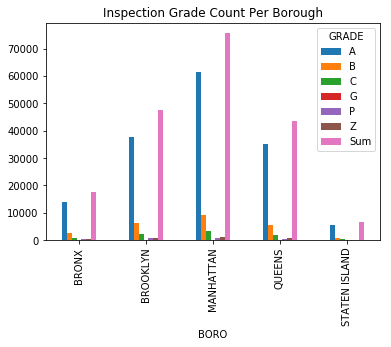

In [839]:
# pd.crosstab(data.BORO, data.GRADE).plot(kind='bar')
pd1.plot(kind='bar',title='Inspection Grade Count Per Borough')


# Top 10 most frequent Violation code

In [841]:
data.VIOLATION_CODE.value_counts(dropna=False).head(10)

10F    54091
08A    41351
04L    28575
06D    26131
06C    24989
10B    22747
02G    21969
02B    19958
04N    19454
04H     8081
Name: VIOLATION_CODE, dtype: int64

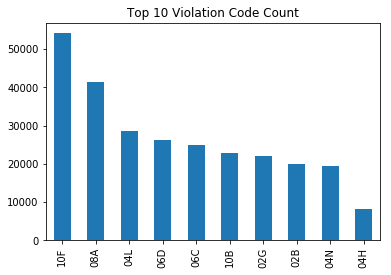

In [842]:
data.VIOLATION_CODE.value_counts(dropna=False).head(10).plot(kind='bar',title='Top 10 Violation Code Count')

## Compare top 10 most frequent violation code for NYC and different borough

In [845]:
pd3=pd.crosstab(data.VIOLATION_CODE, data.BORO)
pd3.columns=pd3.columns.str.strip().str.replace(' ', '_')

code_for_staten=pd3.nlargest(10, ['STATEN_ISLAND']) ['STATEN_ISLAND'].index
code_for_queens=pd3.nlargest(10, ['QUEENS']) ['QUEENS'].index
code_for_man=pd3.nlargest(10, ['MANHATTAN']) ['MANHATTAN'].index
code_for_b=pd3.nlargest(10, ['BROOKLYN']) ['BROOKLYN'].index
code_for_br=pd3.nlargest(10, ['BRONX']) ['BRONX'].index
code_for_all=data.VIOLATION_CODE.value_counts(dropna=False).head(10).index

pd4=pd.DataFrame()
pd4['NYC']=code_for_all
pd4['BRONX']=code_for_br
pd4['BROOKLYN']=code_for_b
pd4['MANHATTAN']=code_for_man
pd4['QUEENS']=code_for_queens
pd4['STATEN_ISLAND']=code_for_staten
pd4

,NYC,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN_ISLAND
0,10F,10F,10F,10F,10F,10F
1,08A,08A,08A,08A,08A,08A
2,04L,04L,04L,06D,04L,06D
3,06D,02B,06C,04L,06C,04L
4,06C,10B,06D,06C,06D,02G
5,10B,04N,10B,10B,02G,06C
6,02G,06C,02G,02G,10B,10B
7,02B,06D,02B,04N,02B,02B
8,04N,02G,04N,02B,04N,04N
9,04H,04M,04M,04H,06E,04H


## For all borough, the most common vialation codes are:
* 10F (Non-food contact surface improperly constructed)
* 08A (Facility not vermin proof)
* 04L(Evidence of mice or live mice present in facility's food and/or non-food areas)
* 06D (Food contact surface not properly washed, rinsed and sanitized after each use)
* 06C (Food not protected from potential source of contamination during storage, preparation, transportation, display or service)


## Top 10 most frequent violation code distribution per borough

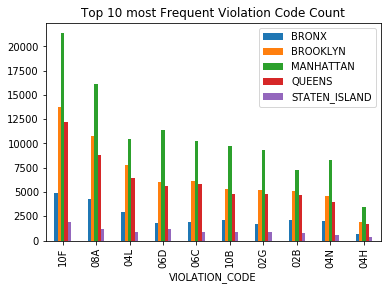

In [847]:
pd3['All']=pd3['BRONX']+pd3['BROOKLYN']+pd3['MANHATTAN']+pd3['Missing']+pd3['QUEENS']+pd3['STATEN_ISLAND']
pd5=pd3.sort_values(by='All', ascending=0).head(10)
pd6=pd.DataFrame()

pd6['BRONX']=pd5['BRONX']
pd6['BROOKLYN']=pd5['BROOKLYN']
pd6['MANHATTAN']=pd5['MANHATTAN']
pd6['QUEENS']=pd5['QUEENS']
pd6['STATEN_ISLAND']=pd5['STATEN_ISLAND']
pd6.plot(kind='bar',title='Top 10 most Frequent Violation Code Count')

GRADE,A,B,C,G,P,Z
GRADE_YEAR,,,,,,
2012.0,2,0,0,0,0,0
2013.0,7,0,0,0,0,0
2014.0,51,3,5,0,0,0
2015.0,5785,920,240,0,52,0
2016.0,34783,5573,1473,0,274,0
2017.0,38945,5860,1808,0,679,17
2018.0,56051,10198,3929,7,1238,409
2019.0,17772,1680,579,0,68,2679


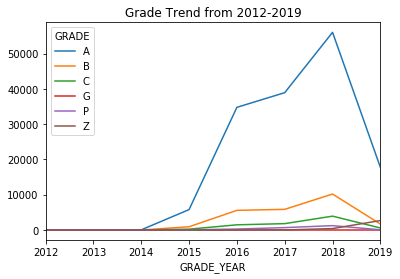

In [861]:
data = pd.read_csv('Inspection.csv')
data.columns = data.columns.str.strip().str.replace(' ', '_')
pd7=pd.DataFrame()
data['GRADE_DATE'] = pd.to_datetime(data['GRADE_DATE']).dt.year

pd7['BORO']=data['BORO']
pd7['GRADE']=data['GRADE']
pd7['GRADE_YEAR']=data['GRADE_DATE']
pd7=pd7.dropna()
pd8=pd7.groupby(['BORO','GRADE','GRADE_YEAR']).size()
pd8=pd.crosstab(pd7.GRADE_YEAR,pd7.GRADE)
pd8=pd8.drop(columns=['Not Yet Graded'])
pd8.plot(title='Grade Trend from 2012-2019')
pd8

## Our Assumption: Local non-chain restaurants perform worse in food inspection than chain restaurants on average 

In [862]:
pd9=pd.DataFrame()

pd9['DBA']=data['DBA']
pd9['GRADE_YEAR']=data['GRADE_DATE']
pd9['STREET']=data['STREET']
pd9=pd9.dropna()
pd10=pd9.groupby(['DBA','STREET']).count()

chain_list=[]
non_chain=[]
dba_list=pd9['DBA'].unique()
for value in dba_list:
    if pd10.loc[value].count().values[0]>1:
        chain_list.append(value)
    else:
        non_chain.append(value)
 

pd11=pd.DataFrame()
pd11['DBA']=data['DBA']
pd11['GRADE']=data['GRADE']
pd11=pd11.dropna()


pd11=pd.crosstab(pd11.DBA,pd11.GRADE)
pd11=pd11.drop(columns=['Not Yet Graded'])

pd12=pd11

# get a grade table for all chain resturants
for index1, row in pd12.iterrows():
    if index1 in non_chain:
        pd12=pd12.drop(index=index1)
pd12



GRADE,A,B,C,G,P,Z
DBA,,,,,,
& PIZZA,12,0,0,0,0,0
10 BELOW ICE CREAM,17,0,0,0,1,0
101 KENNEDY FRIED CHICKEN,0,0,0,0,0,0
101BROOKLYN DISCO BAR,0,0,0,0,0,0
124 CAFE,0,0,0,0,0,0
16 HANDLES,53,5,1,0,0,0
1847 INTERNATIONAL,0,0,0,0,0,0
191 KNICKERBOCKER AVENUE,0,0,0,0,0,0
2 BROS PIZZA,36,3,5,0,2,0


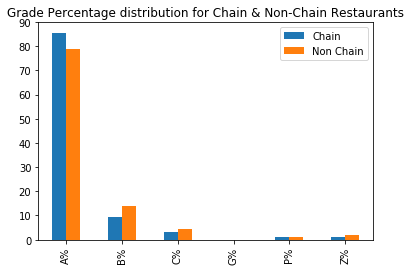

In [864]:
chain_sum=pd12['A'].sum()+pd12['B'].sum()+pd12['C'].sum()+pd12['G'].sum()+pd12['P'].sum()+pd12['Z'].sum()

a_c=round(pd12['A'].sum()/chain_sum*100,2)
b_c=round(pd12['B'].sum()/chain_sum*100,2)
c_c=round(pd12['C'].sum()/chain_sum*100,2)
g_c=round(pd12['G'].sum()/chain_sum*100,2)
p_c=round(pd12['P'].sum()/chain_sum*100,2)
z_c=round(pd12['Z'].sum()/chain_sum*100,2)

for index1, row in pd11.iterrows():
    if index1 in chain_list:
        pd11=pd11.drop(index1)

nonchain_sum=pd11['A'].sum()+pd11['B'].sum()+pd11['C'].sum()+pd11['G'].sum()+pd11['P'].sum()+pd11['Z'].sum()
a_n=round(pd11['A'].sum()/nonchain_sum*100,2)
b_n=round(pd11['B'].sum()/nonchain_sum*100,2)
c_n=round(pd11['C'].sum()/nonchain_sum*100,2)
g_n=round(pd11['G'].sum()/nonchain_sum*100,2)
p_n=round(pd11['P'].sum()/nonchain_sum*100,2)
z_n=round(pd11['Z'].sum()/nonchain_sum*100,2)

df_chain_nonchain = pd.DataFrame(np.array([[a_c,b_c,c_c,g_c,p_c,z_c], [a_n,b_n,c_n,g_n,p_n,z_n]]),columns=['A%', 'B%','C%','G%','P%','Z%'])

plot=df_chain_nonchain.T
plot.columns = ['Chain', 'Non Chain']
plot.plot(kind='bar',title="Grade Percentage distribution for Chain & Non-Chain Restaurants")


In [625]:
population = pd.read_csv('Population.csv')

p1=population['Borough;Year;FIPS County Code;NTA Code;NTA Name;Population'].str.split(';', expand=True)
p1.columns = ["Borough","Year","FIPS_County_Code","NTA_Code","NTA_Name","Population1"]
p1['pp']=population['Unnamed: 1']
p1['pp'] = p1['pp'].astype(str)
p1['Population1'] = p1['Population1'].astype(str)
p1['Population'] = p1.Population1.str.cat(p1.pp.str)

p1['Population'] = p1['Population'].astype(float)
p1=p1.drop(columns=['Population1', 'pp'])
p1

,Borough,Year,FIPS_County_Code,NTA_Code,NTA_Name,Population
0,Bronx,2000,005,BX01,Claremont-Bathgate,28149.0
1,Bronx,2000,005,BX03,Eastchester-Edenwald-Baychester,35422.0
2,Bronx,2000,005,BX05,Bedford Park-Fordham North,55329.0
3,Bronx,2000,005,BX06,Belmont,25967.0
4,Bronx,2000,005,BX07,Bronxdale,34309.0
5,Bronx,2000,005,BX08,West Farms-Bronx River,34542.0
6,Bronx,2000,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,50753.0
7,Bronx,2000,005,BX10,Pelham Bay-Country Club-City Island,27140.0
8,Bronx,2000,005,BX13,Co-Op City,40676.0
9,Bronx,2000,005,BX14,East Concourse-Concourse Village,58961.0


In [689]:
p2=pd.DataFrame()

p2['Borough']=p1['Borough']
p2['Year']=p1['Year']
p2['Population']=p1['Population']
p3=p2.groupby(['Borough','Year']).sum()

p3.loc[('Bronx', '2000'),'Population']
p3.loc[('Bronx', '2010'),'Population Growth % (2000-2010)']=round((p3.loc[('Bronx', '2010'),'Population']-p3.loc[('Bronx', '2000'),'Population'])/p3.loc[('Bronx', '2000'),'Population']*100,2)
p3.loc[('Brooklyn', '2010'),'Population Growth % (2000-2010)']=round((p3.loc[('Brooklyn', '2010'),'Population']-p3.loc[('Brooklyn', '2000'),'Population'])/p3.loc[('Brooklyn', '2000'),'Population']*100,2)
p3.loc[('Manhattan', '2010'),'Population Growth % (2000-2010)']=round((p3.loc[('Manhattan', '2010'),'Population']-p3.loc[('Manhattan', '2000'),'Population'])/p3.loc[('Manhattan', '2000'),'Population']*100,2)
p3.loc[('Queens', '2010'),'Population Growth % (2000-2010)']=round((p3.loc[('Queens', '2010'),'Population']-p3.loc[('Queens', '2000'),'Population'])/p3.loc[('Queens', '2000'),'Population']*100,2)
p3.loc[('Staten Island', '2010'),'Population Growth % (2000-2010)']=round((p3.loc[('Staten Island', '2010'),'Population']-p3.loc[('Staten Island', '2000'),'Population'])/p3.loc[('Staten Island', '2000'),'Population']*100,2)


p3=p3.drop(index=('Bronx', '2000'))
p3=p3.drop(index=('Brooklyn', '2000'))
p3=p3.drop(index=('Manhattan', '2000'))
p3=p3.drop(index=('Queens', '2000'))
p3=p3.drop(index=('Staten Island', '2000'))


# p3.rename(index=str, columns={"Population Growth %": "Population Growth % (2000-2010)"})


p3



,,Population,Population Growth % (2000-2010)
Borough,Year,,
Bronx,2010,1277855.0,7.94
Brooklyn,2010,2424162.0,18.90
Manhattan,2010,1506805.0,10.88
Queens,2010,1903939.0,1.55
Staten Island,2010,430602.0,13.73


In [814]:
p5=pd.DataFrame()
p5['Borough']=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']
p5['Population in 2010']=p3['Population'].values
p5['Population estimates for 2017']=[1471160,2648771,1664727,2358582, 479458]
p5['Population estimates for 2018']=[1432132,2582830,1628701,2278906, 476179]
p5['Population Growth % (2017-2018)']=round((p5['Population estimates for 2018']-p5['Population estimates for 2017'])/p5['Population estimates for 2017']*100,2)

p5['Population Growth % (2000-2010)']=p3['Population Growth % (2000-2010)'].values
p5['Population Growth % (2010-2018)']=round((p5['Population estimates for 2018']-p5['Population in 2010'])/p5['Population in 2010']*100,2)

p5



,Borough,Population in 2010,Population estimates for 2017,Population estimates for 2018,Population Growth % (2017-2018),Population Growth % (2000-2010),Population Growth % (2010-2018)
0,Bronx,1277855.0,1471160,1432132,-2.65,7.94,12.07
1,Brooklyn,2424162.0,2648771,2582830,-2.49,18.90,6.55
2,Manhattan,1506805.0,1664727,1628701,-2.16,10.88,8.09
3,Queens,1903939.0,2358582,2278906,-3.38,1.55,19.69
4,Staten Island,430602.0,479458,476179,-0.68,13.73,10.58


## There is a negative relationship between neighbourhood population, population growth and restaurant inspection performance. In other words, when there are more people or when there are more population growth in a neighbourhood , the restaurant inspection results will be worse.

## accoording to https://www.census.gov/quickfacts/fact/table/newyorkcitynewyork,bronxcountybronxboroughnewyork,kingscountybrooklynboroughnewyork,newyorkcountymanhattanboroughnewyork,queenscountyqueensboroughnewyork,richmondcountystatenislandboroughnewyork/PST045218

In [784]:
p4=pd.DataFrame()

p4['BORO']=data['BORO']
p4['GRADE']=data['GRADE']
p4['GRADE_YEAR']=data['GRADE_DATE']
p4=p4.dropna()

p6=p4.groupby(['BORO','GRADE','GRADE_YEAR']).size()

p7=p6.unstack()
# pd.crosstab(p4.BORO,p4.GRADE).unstack()
# pd.crosstab(p4.BORO,p4.GRADE_YEAR)
p7=p7.drop(columns=[2012.0,2013.0,2014.0,2015.0,2019.0])


p7=p7.drop(index=[('BROOKLYN', 'Not Yet Graded'),('Missing', 'A'), ('Missing', 'B'),('Missing', 'C')])

# pd.crosstab(p7.BORO,p7.GRADE)

# p7[2012.0]

# for col in p7.columns: 
#     print(col) 

# p7.groupby(['BORO','GRADE','GRADE_YEAR']).size()



p7

GRADE_YEAR            2016.0   2017.0   2018.0
BORO          GRADE                           
BRONX         A       3153.0   3587.0   4925.0
              B        643.0    514.0    933.0
              C        196.0    163.0    405.0
              P         34.0     47.0    116.0
              Z          NaN      4.0     38.0
BROOKLYN      A       8320.0   9651.0  13927.0
              B       1534.0   1507.0   2676.0
              C        361.0    472.0    963.0
              G          NaN      NaN      2.0
              P         88.0    222.0    332.0
              Z          NaN      3.0    129.0
MANHATTAN     A      14264.0  15693.0  22161.0
              B       2081.0   2218.0   3935.0
              C        629.0    732.0   1555.0
              G          NaN      NaN      5.0
              P        101.0    251.0    453.0
              Z          NaN      8.0    126.0
QUEENS        A       7793.0   8604.0  13120.0
              B       1112.0   1343.0   2286.0
              C        267.0    370.0    879.0
              P         49.0    135.0    298.0
              Z          NaN      2.0    106.0
STATEN ISLAND A       1242.0   1391.0   1906.0
              B        197.0    275.0    368.0
              C         20.0     71.0    121.0
              P          2.0     24.0     39.0
              Z          NaN      NaN     10.0

In [785]:
p_2016=p7.drop(columns=[2017.0,2018.0])
BRONX_sum_2016=p_2016.loc[('BRONX', 'A')].values[0]+p_2016.loc[('BRONX', 'B')].values[0]+p_2016.loc[('BRONX', 'C')].values[0]+p_2016.loc[('BRONX', 'P')].values[0]
BROOKLYN_sum_2016=p_2016.loc[('BROOKLYN', 'A')].values[0]+p_2016.loc[('BROOKLYN', 'B')].values[0]+p_2016.loc[('BROOKLYN', 'C')].values[0]+p_2016.loc[('BROOKLYN', 'P')].values[0]
MANHATTAN_sum_2016=p_2016.loc[('MANHATTAN', 'A')].values[0]+p_2016.loc[('MANHATTAN', 'B')].values[0]+p_2016.loc[('MANHATTAN', 'C')].values[0]+p_2016.loc[('MANHATTAN', 'P')].values[0]
QUEENS_sum_2016=p_2016.loc[('QUEENS', 'A')].values[0]+p_2016.loc[('QUEENS', 'B')].values[0]+p_2016.loc[('QUEENS', 'C')].values[0]+p_2016.loc[('QUEENS', 'P')].values[0]
ISLAND_sum_2016=p_2016.loc[('STATEN ISLAND', 'A')].values[0]+p_2016.loc[('STATEN ISLAND', 'B')].values[0]+p_2016.loc[('STATEN ISLAND', 'C')].values[0]+p_2016.loc[('STATEN ISLAND', 'P')].values[0]





In [786]:
p_2017=p7.drop(columns=[2016.0,2018.0])
BRONX_sum_2017=p_2017.loc[('BRONX', 'A')].values[0]+p_2017.loc[('BRONX', 'B')].values[0]+p_2017.loc[('BRONX', 'C')].values[0]+p_2017.loc[('BRONX', 'P')].values[0]+p_2017.loc[('BRONX', 'Z')].values[0]
BROOKLYN_sum_2017=p_2017.loc[('BROOKLYN', 'A')].values[0]+p_2017.loc[('BROOKLYN', 'B')].values[0]+p_2017.loc[('BROOKLYN', 'C')].values[0]+p_2017.loc[('BROOKLYN', 'P')].values[0]+p_2017.loc[('BROOKLYN', 'Z')].values[0]
MANHATTAN_sum_2017=p_2017.loc[('MANHATTAN', 'A')].values[0]+p_2017.loc[('MANHATTAN', 'B')].values[0]+p_2017.loc[('MANHATTAN', 'C')].values[0]+p_2017.loc[('MANHATTAN', 'P')].values[0]+p_2017.loc[('MANHATTAN', 'Z')].values[0]
QUEENS_sum_2017=p_2017.loc[('QUEENS', 'A')].values[0]+p_2017.loc[('QUEENS', 'B')].values[0]+p_2017.loc[('QUEENS', 'C')].values[0]+p_2017.loc[('QUEENS', 'P')].values[0]
ISLAND_sum_2017=p_2017.loc[('STATEN ISLAND', 'A')].values[0]+p_2017.loc[('STATEN ISLAND', 'B')].values[0]+p_2017.loc[('STATEN ISLAND', 'C')].values[0]+p_2017.loc[('STATEN ISLAND', 'P')].values[0]



In [787]:
p_2018=p7.drop(columns=[2016.0,2017.0])

BRONX_sum_2018=p_2018.loc[('BRONX', 'A')].values[0]+p_2018.loc[('BRONX', 'B')].values[0]+p_2018.loc[('BRONX', 'C')].values[0]+p_2018.loc[('BRONX', 'P')].values[0]+p_2018.loc[('BRONX', 'Z')].values[0]
BROOKLYN_sum_2018=p_2018.loc[('BROOKLYN', 'A')].values[0]+p_2018.loc[('BROOKLYN', 'B')].values[0]+p_2018.loc[('BROOKLYN', 'C')].values[0]+p_2018.loc[('BROOKLYN', 'P')].values[0]+p_2018.loc[('BROOKLYN', 'Z')].values[0]+p_2018.loc[('BROOKLYN', 'G')].values[0]
MANHATTAN_sum_2018=p_2018.loc[('MANHATTAN', 'A')].values[0]+p_2018.loc[('MANHATTAN', 'B')].values[0]+p_2018.loc[('MANHATTAN', 'C')].values[0]+p_2018.loc[('MANHATTAN', 'P')].values[0]+p_2018.loc[('MANHATTAN', 'Z')].values[0]
QUEENS_sum_2018=p_2018.loc[('QUEENS', 'A')].values[0]+p_2018.loc[('QUEENS', 'B')].values[0]+p_2018.loc[('QUEENS', 'C')].values[0]+p_2018.loc[('QUEENS', 'P')].values[0]
ISLAND_sum_2018=p_2018.loc[('STATEN ISLAND', 'A')].values[0]+p_2018.loc[('STATEN ISLAND', 'B')].values[0]+p_2018.loc[('STATEN ISLAND', 'C')].values[0]+p_2018.loc[('STATEN ISLAND', 'P')].values[0]




In [807]:
p8=pd.DataFrame()
p8['Borough']=['Bronx','Brooklyn','Manhattan','Queens','Staten Island']

p8['Rating Sum in 2016']=[BRONX_sum_2016,BROOKLYN_sum_2016,MANHATTAN_sum_2016,QUEENS_sum_2016,ISLAND_sum_2016]
p8['Rating Sum in 2017']=[BRONX_sum_2017,BROOKLYN_sum_2017,MANHATTAN_sum_2017,QUEENS_sum_2017,ISLAND_sum_2017]
p8['Rating Sum in 2018']=[BRONX_sum_2018,BROOKLYN_sum_2018,MANHATTAN_sum_2018,QUEENS_sum_2018,ISLAND_sum_2018]

p8['A in 2016']=[p_2016.loc[('BRONX', 'A')].values[0],p_2016.loc[('BROOKLYN', 'A')].values[0],p_2016.loc[('MANHATTAN', 'A')].values[0],p_2016.loc[('QUEENS', 'A')].values[0],p_2016.loc[('STATEN ISLAND', 'A')].values[0]]
p8['A in 2017']=[p_2017.loc[('BRONX', 'A')].values[0],p_2017.loc[('BROOKLYN', 'A')].values[0],p_2017.loc[('MANHATTAN', 'A')].values[0],p_2017.loc[('QUEENS', 'A')].values[0],p_2017.loc[('STATEN ISLAND', 'A')].values[0]]
p8['A in 2018']=[p_2018.loc[('BRONX', 'A')].values[0],p_2018.loc[('BROOKLYN', 'A')].values[0],p_2018.loc[('MANHATTAN', 'A')].values[0],p_2018.loc[('QUEENS', 'A')].values[0],p_2018.loc[('STATEN ISLAND', 'A')].values[0]]

p8['A% in 2016']=round(p8['A in 2016']/p8['Rating Sum in 2016']*100,2)
p8['A% in 2017']=round(p8['A in 2017']/p8['Rating Sum in 2017']*100,2)
p8['A% in 2018']=round(p8['A in 2018']/p8['Rating Sum in 2018']*100,2)

p8['A% growth from 2016-2017']=round((p8['A% in 2017']-p8['A% in 2016'])/p8['A% in 2016']*100,2)
p8['A% growth from 2017-2018']=round((p8['A% in 2018']-p8['A% in 2017'])/p8['A% in 2017']*100,2)

p8=p8.drop(columns=['Rating Sum in 2016', 'Rating Sum in 2017','Rating Sum in 2018','A in 2016','A in 2017','A in 2018'])

p8  
    

,Borough,A% in 2016,A% in 2017,A% in 2018,A% growth from 2016-2017,A% growth from 2017-2018
0,Bronx,78.32,83.13,76.75,6.14,-7.67
1,Brooklyn,80.75,81.41,77.25,0.82,-5.11
2,Manhattan,83.54,83.02,78.50,-0.62,-5.44
3,Queens,84.51,82.32,79.12,-2.59,-3.89
4,Staten Island,85.01,78.99,78.31,-7.08,-0.86


In [815]:
pd.concat([p5, p8], axis=1, join_axes=[p5.index])
# drop(columns=['Borough'])


,Borough,Population in 2010,Population estimates for 2017,Population estimates for 2018,Population Growth % (2017-2018),Population Growth % (2000-2010),Population Growth % (2010-2018),A% in 2016,A% in 2017,A% in 2018,A% growth from 2016-2017,A% growth from 2017-2018
0,Bronx,1277855.0,1471160,1432132,-2.65,7.94,12.07,78.32,83.13,76.75,6.14,-7.67
1,Brooklyn,2424162.0,2648771,2582830,-2.49,18.90,6.55,80.75,81.41,77.25,0.82,-5.11
2,Manhattan,1506805.0,1664727,1628701,-2.16,10.88,8.09,83.54,83.02,78.50,-0.62,-5.44
3,Queens,1903939.0,2358582,2278906,-3.38,1.55,19.69,84.51,82.32,79.12,-2.59,-3.89
4,Staten Island,430602.0,479458,476179,-0.68,13.73,10.58,85.01,78.99,78.31,-7.08,-0.86
